In [1]:
import pandas as pd

from cisvis.identify import identify_compound
%matplotlib inline
from cisclient.client import CISClient
from cisvis.spectra import generate_similarity_plot, generate_spectra_plot, to_dataframe, generate_histogram_intensity, \
    generate_histogram_accurate_mass, generate_histogram_ri, generate_similarity_histogram

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 5]


In [2]:
# these are parameterized over papermill
cis_url = 'https://dev-api.metabolomics.us/cis'
cis_api_token = 'rDJfRW6ilG2WooOR72AaE3NqL4m23WvY6ub4FEoS'


# WRONG annotation!!! splash = 'splash10-004i-0090000200-0b8bec841b059881a095' #splash10-0udi-0313009000-bf3167aa021f374219c2'
# WRONG splash = 'splash10-004i-0900000000-2014f834b06386af7675'
# WRONG splash = 'splash10-004i-1190100400-5e701c99e410f4009a46'
# WRONG splash = 'splash10-001i-0059000200-288624b0f4972d6ab94b'
# splash = 'splash10-0a6r-0095000300-d0ec9d6064c5d25e5508'
splash = 'splash10-0udi-3691100000-369302912bd1acd81cf7'
#splash = 'splash10-001i-0009100200-95db569b160a47e51cc3'

library = 'soqe[M-H] | QExactive | test | negative'

In [3]:

client =  CISClient(cis_url, cis_api_token)
compound = client.get_compound(library=library,splash=splash)
members = list( map(lambda member: client.get_compound(library=library,splash=member),client.get_members(library=library,splash=splash)))

# Compound Generation report

Welcome to the compound generation overview report. The main purpose is to help you diagnose the generation of compounds as well as get a better understanding why it was generated in the first place.

In [4]:
to_dataframe([compound]).drop(['spectrum','ms_level','required_for_correction','inchi_key','splash','unique_mass'],axis=1)

,id,accurate_mass,target_type,matrix,method,retention_index,sample,name,precursor_mass
0,799869,719.151123,CONFIRMED_CONSENSUS,,soqe[M-H] | QExactive | test | negative,224.411746,unknown,unknown_719.1511_224.4117,719.151123


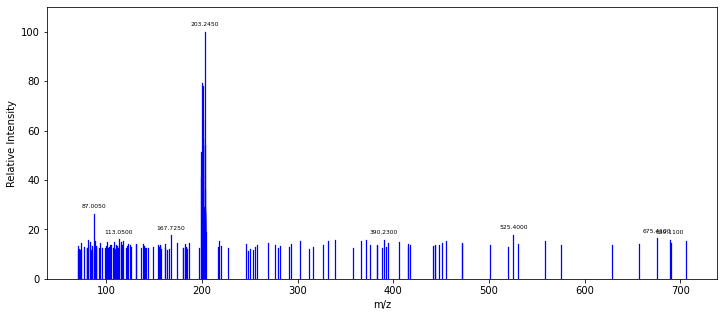

In [5]:
generate_spectra_plot(compound=compound)

This is a histogram plot of the retention index of all the members making up this compound. Please be aware that due to settings the range will never exceed these boundaeries

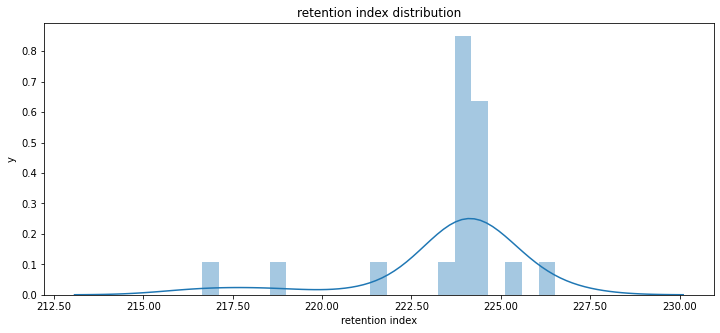

In [6]:
generate_histogram_ri(members)

This is a histogram plot of the accurate mass of all the members making up this compound. Please be aware that due to settings the range will never exceed these boundaeries

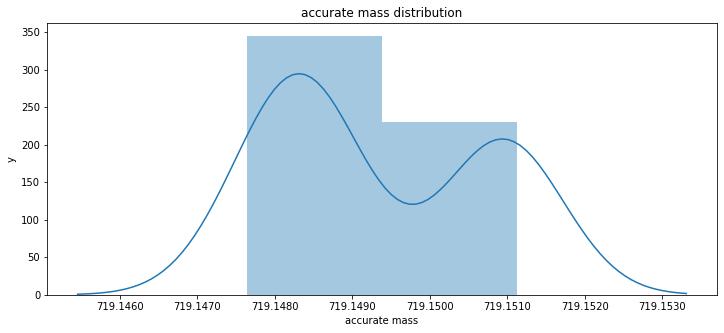

In [7]:
generate_histogram_accurate_mass(members)

This is a histogram plot of the basepeak intensity of all the members making up this compound. There are no related settings which affect this, except for
for a required min intensity setting for the Pre Cursor Mass.

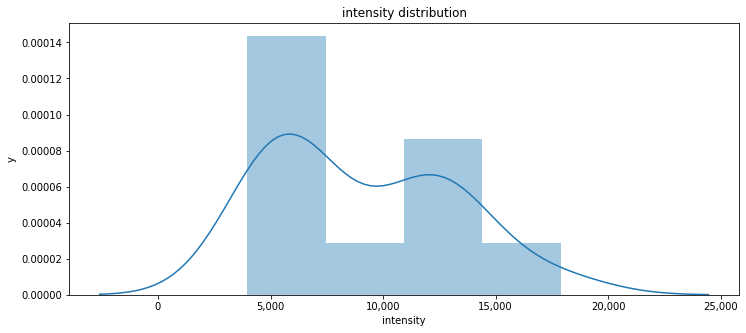

In [8]:
generate_histogram_intensity(members)

This plot demonstrates a similarity plot of all spectra making up this compond against each other. The purpose is mostly for diagnostics and finetuning of settings as well as discovering possible outliers.

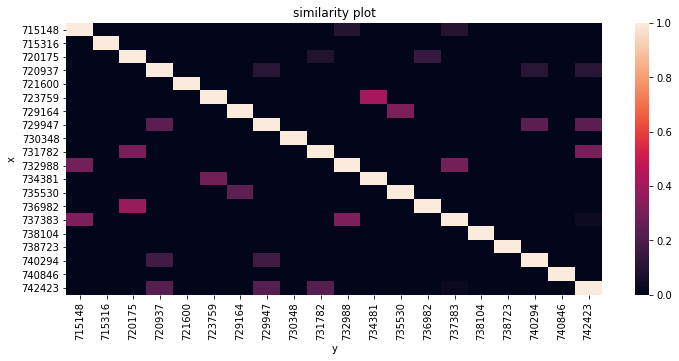

In [9]:
generate_similarity_plot(members)

This is a tabular representation of all members of this compound, with their most important properties.

In [10]:
to_dataframe(members).drop(['spectrum','method','ms_level','required_for_correction','inchi_key','target_type','splash','unique_mass','name'],axis=1)

,id,accurate_mass,matrix,retention_index,sample,precursor_mass
0,721600,719.147644,,225.533975,NIH_Lip_Std_CSH_NEG_Preinj_07_200309132433,719.147644
1,715316,719.147888,,226.529140,NIH_Lip_Std_CSH_NEG_Preinj_07_200309150530,719.147888
2,729164,719.147949,,223.723907,NIH_Lip_Std_CSH_NEG_Splash_w_old_stds_01,719.147949
3,734381,719.148010,,218.602122,NIH_Lip_Std_CSH_NEG_Preinj_07_200309125423,719.148010
4,732988,719.148376,,221.596829,NIH_Lip_Std_CSH_NEG_Preinj_07_200309163549,719.148376
5,738104,719.148376,,223.923963,NIH_Lip_Std_CSH_NEG_Splash_10xdil_02,719.148376
6,740846,719.148376,,224.072585,NIH_Lip_Std_CSH_NEG_Splash_w_old_stds_03,719.148376
7,737383,719.148438,,216.649803,NIH_Lip_Std_CSH_NEG_Preinj_07_200309153535,719.148438
8,720175,719.148499,,223.738271,NIH_Lip_Std_CSH_NEG_Splash_10xdil_03,719.148499
9,715148,719.148621,,223.572325,NIH_Lip_Std_CSH_NEG_Preinj_07_200309160542,719.148621


721600


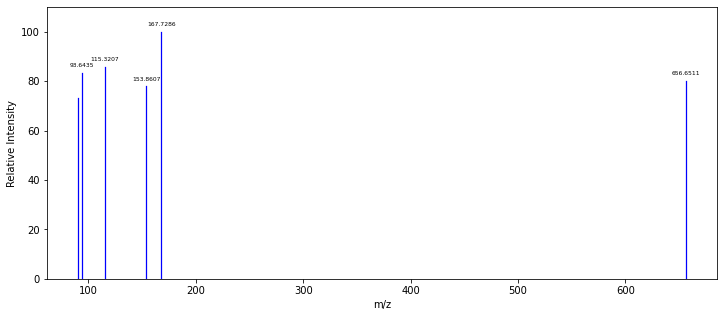

715316


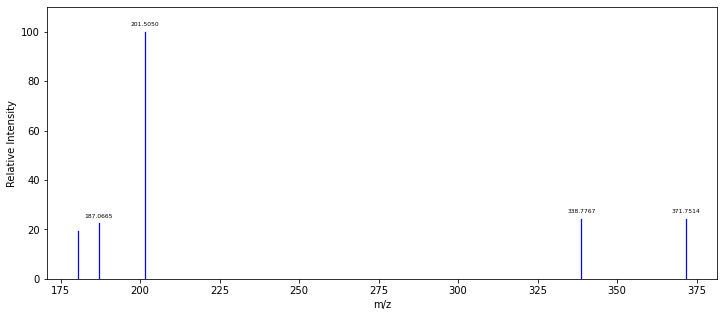

729164


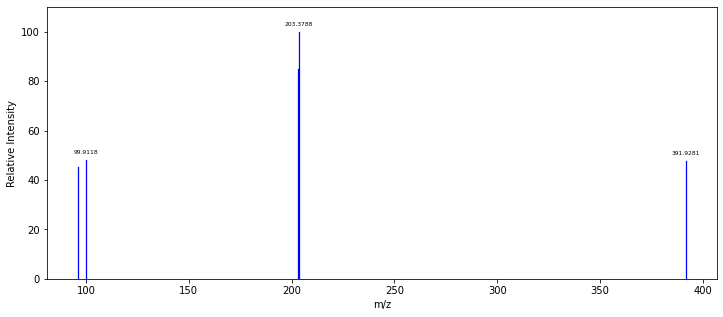

734381


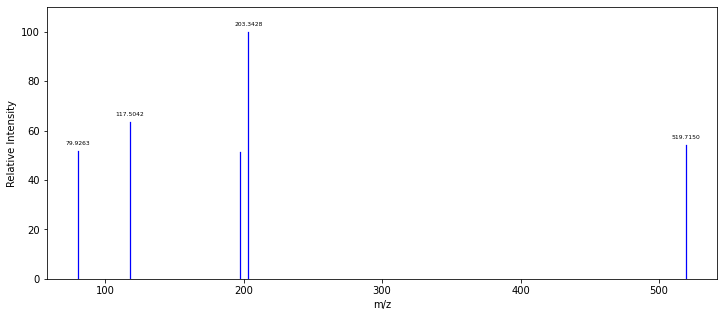

732988


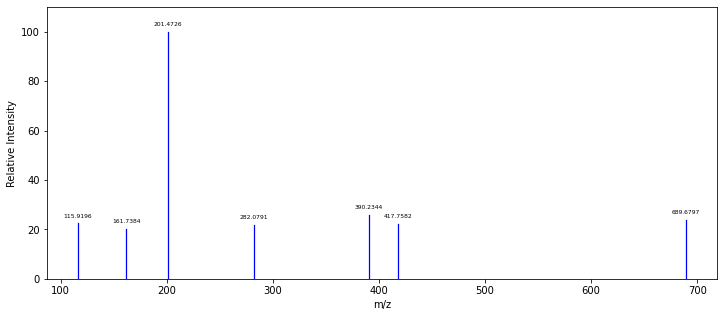

738104


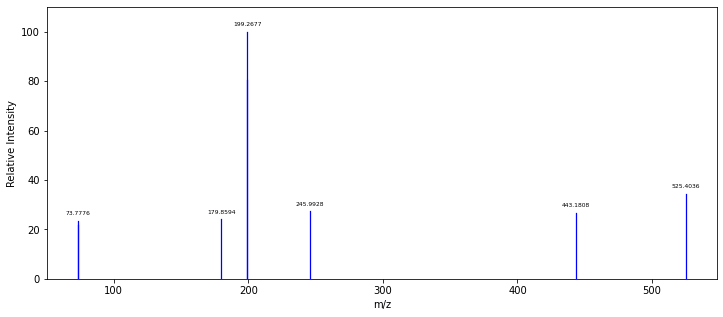

740846


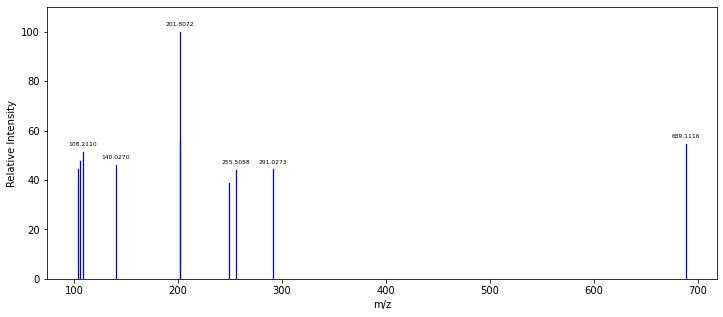

737383


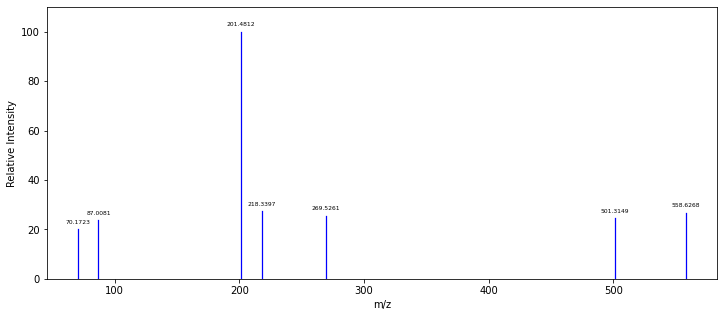

720175


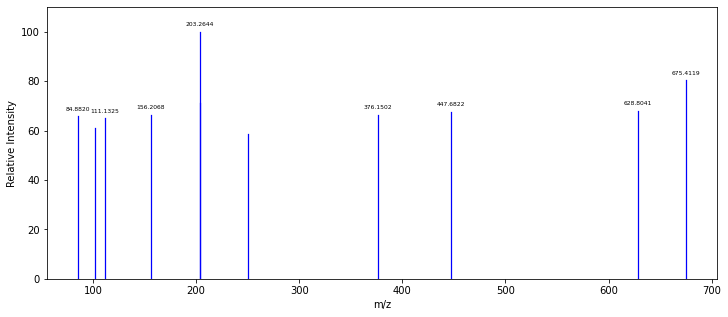

715148


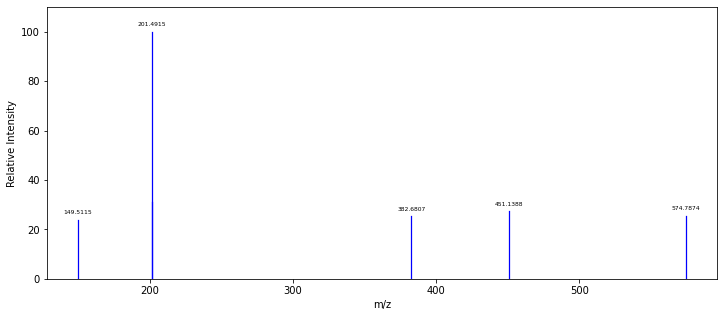

723759


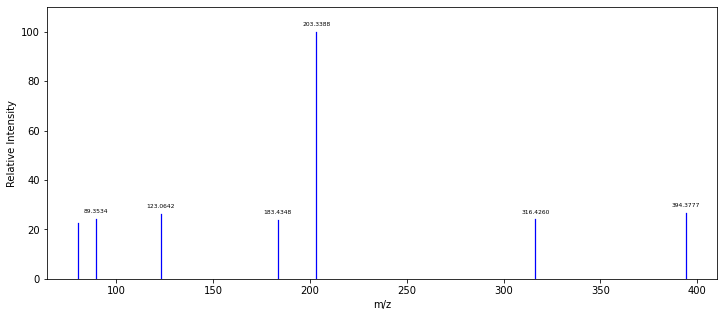

735530


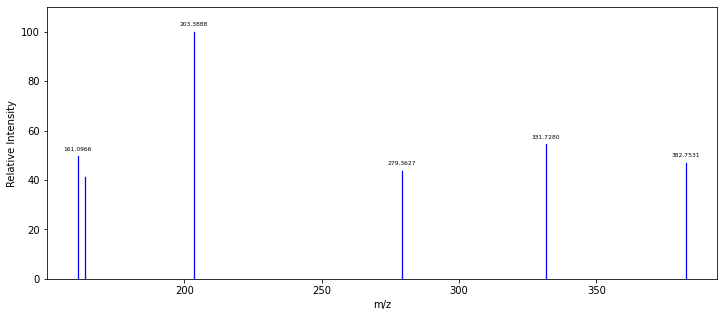

730348


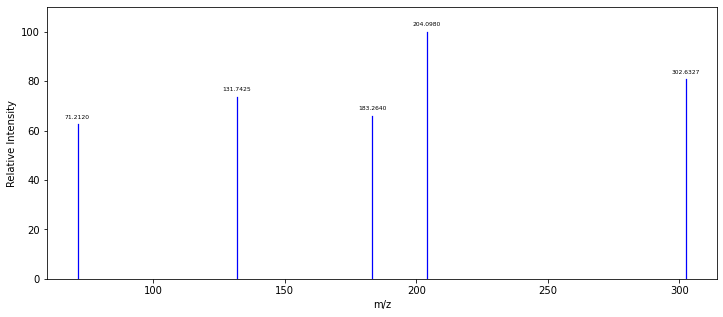

720937


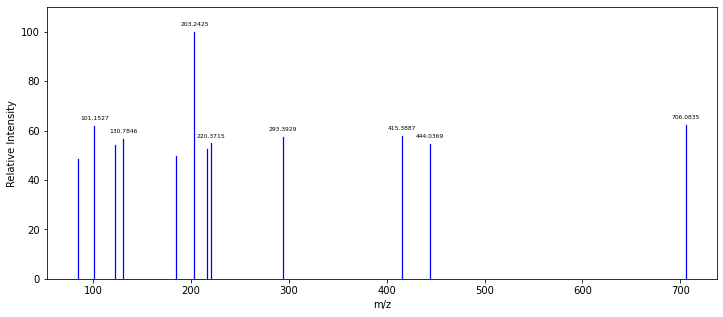

729947


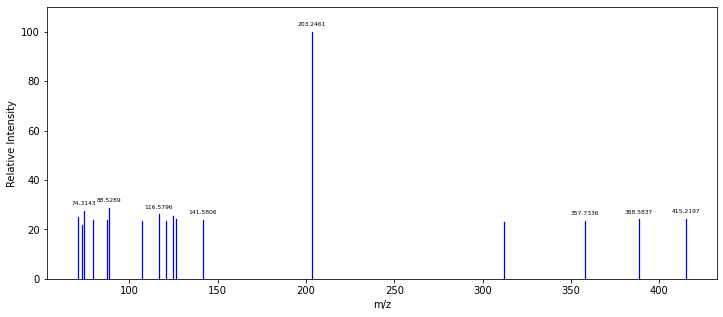

742423


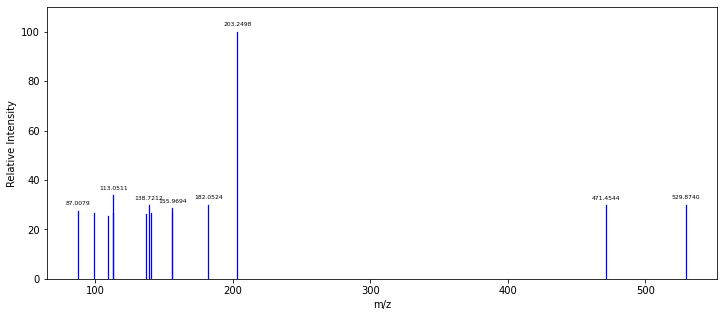

731782


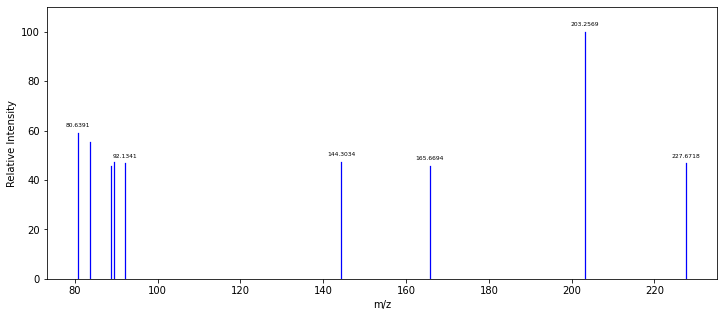

738723


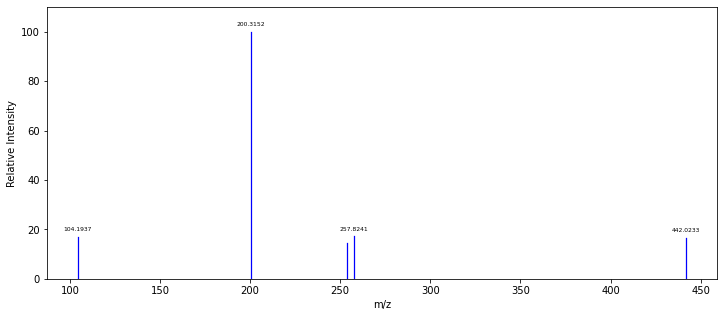

736982


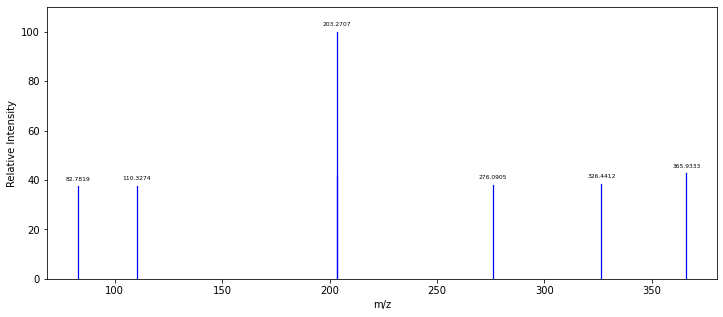

740294


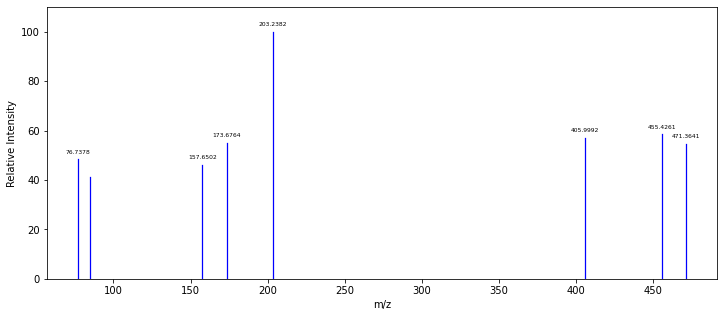

In [11]:

for member in members:


    print(member['id'])
    generate_spectra_plot(compound=member)

This is an overview of the similarity distribution of all members for this compoaund against the consensus spectra. The consensus spectra includes all if it's members in it!

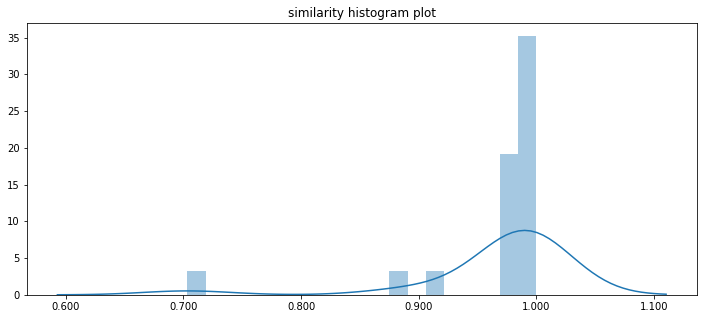

In [12]:
generate_similarity_histogram(compound,members)

Below here you can find a quick similarity search of potential identifications of this particular compound.

In [13]:
result = identify_compound(compound)
df = pd.DataFrame(result)

if 'spectrum' in df.columns:
    df = df.drop(['spectrum'],axis=1)
else:
    print("sorry no similarity hits found!")

sorry no similarity hits found!


In [14]:
df

""
